# KNN Example

In [1]:
import pandas as pd

train=pd.read_csv("hw2train.csv")
test=pd.read_csv("hw2test.csv")

In [2]:
test.head()

,X1,X2,target
0,255,11,2
1,224,7,2
2,114,14,1
3,255,22,2
4,67,6,1


In [3]:
train.head()

,X1,X2,target
0,31,22,2
1,194,20,2
2,75,11,2
3,103,15,1
4,255,20,2


In [4]:
#determine features and labels
X_train=train.drop('target',axis=1)
X_test=test.drop('target',axis=1)
y_train=train['target']
y_test=test['target']

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2500, 2)
(2500,)
(5000, 2)
(5000,)


## KNN Model

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
knn=KNeighborsClassifier(n_neighbors=7)

In [8]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [9]:
y_pred=knn.predict(X_test)

In [10]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.8094

## KNN for Different K Values

### Evaluation on Train Data

In [11]:
k_range=range(1,35,2)

train_accuracy_scores=[]
best_k_train=0
max_train=0
train_values={}

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_train_pred=knn.predict(X_train)
    
    train_score=metrics.accuracy_score(y_train,y_train_pred)
    train_accuracy_scores.append(train_score)
    
    train_values[k]=train_score
    
    if train_score>max_train:
        max_train=train_score
        best_k_train=k

In [12]:
train_values

{1: 0.8692,
 3: 0.8472,
 5: 0.8256,
 7: 0.8388,
 9: 0.8428,
 11: 0.8412,
 13: 0.8504,
 15: 0.8472,
 17: 0.8424,
 19: 0.8404,
 21: 0.8364,
 23: 0.8352,
 25: 0.8328,
 27: 0.8308,
 29: 0.832,
 31: 0.8336,
 33: 0.8316}

In [13]:
print("The Best K for Training Accuracy: ",best_k_train)

The Best K for Training Accuracy:  1


Text(0, 0.5, 'Training Accuracy')

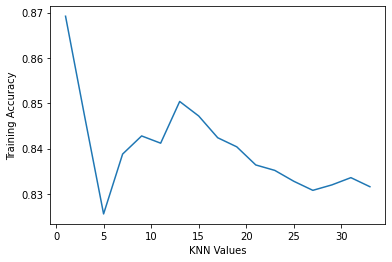

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range,train_accuracy_scores)
plt.xlabel('KNN Values')
plt.ylabel('Training Accuracy')

### Evaluation on Test Data

In [15]:
# k_range=range(1,35,2)

test_accuracy_scores=[]
best_k_test=0
max_test=0
test_values={}

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_test_pred=knn.predict(X_test)
    
    test_score=metrics.accuracy_score(y_test,y_test_pred)
    test_accuracy_scores.append(test_score)
    
    test_values[k]=test_score
    
    if test_score>max_test:
        max_test=test_score
        best_k_test=k

In [16]:
print("The Best K for Training Accuracy: ",best_k_test)

The Best K for Training Accuracy:  13


Text(0, 0.5, 'Testing Accuracy')

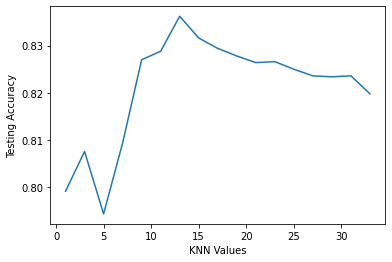

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range,test_accuracy_scores)
plt.xlabel('KNN Values')
plt.ylabel('Testing Accuracy')

### Both in the same plot

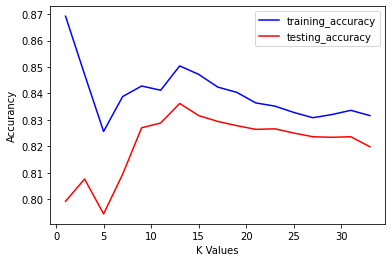

In [18]:
plt.plot(k_range, train_accuracy_scores,color="blue",label="training_accuracy")
plt.plot(k_range, test_accuracy_scores, color="red", label="testing_accuracy")
plt.xlabel("K Values")
plt.ylabel("Accurancy")
plt.legend()
plt.show()

The accuracy score on Training data with K=13 is less than the score with K=1. But we do not evaluate the model according to Training scores, not Testing scores. 

## KNN on Scaled The Data

In [19]:
train.X1.describe()

count    2500.000000
mean      191.212800
std        82.074315
min         0.000000
25%       126.750000
50%       255.000000
75%       255.000000
max       255.000000
Name: X1, dtype: float64

In [20]:
train.X2.describe()

count    2500.000000
mean       13.177600
std         7.414853
min         0.000000
25%         7.000000
50%        13.000000
75%        20.000000
max        34.000000
Name: X2, dtype: float64

Since there is a huge difference between the values of data, we have to scale it.

### Scale the Data

In [21]:
from sklearn import preprocessing

In [22]:
scaler=preprocessing.RobustScaler().fit(X_train)

In [23]:
X_train_scaled=scaler.transform(X_train)
X_train_scaled

array([[-1.74658869,  0.69230769],
       [-0.47563353,  0.53846154],
       [-1.40350877, -0.15384615],
       ...,
       [-0.32748538,  0.53846154],
       [ 0.        , -0.07692308],
       [ 0.        , -0.46153846]])

In [24]:
X_test_scaled=scaler.transform(X_test)
X_test_scaled

array([[ 0.        , -0.15384615],
       [-0.2417154 , -0.46153846],
       [-1.0994152 ,  0.07692308],
       ...,
       [-0.75633528,  0.30769231],
       [ 0.        ,  0.92307692],
       [-1.1539961 ,  0.23076923]])

### Train the KNN Model with New Data

In [25]:
#Now find the best K value and the corresponding score on Test Data
testing_accuracy_scores=[]
training_accuracy_scores=[]
testing_values={}
best_k_test_scaled = 0
max_val_test = 0

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    y_training_pred = knn.predict(X_train_scaled)
    train_score = metrics.accuracy_score(y_train, y_training_pred)
    training_accuracy_scores.append(train_score)

    y_test_pred = knn.predict(X_test_scaled)
    test_score = metrics.accuracy_score(y_test, y_test_pred)
    testing_accuracy_scores.append(test_score)
    
    testing_values[k]=test_score
    
    if test_score > max_val_test:
        max_val_test = test_score;
        best_k_test_scaled = k;

In [26]:
print("Best K on scaled data = ", best_k_test_scaled)

Best K on scaled data =  5


In [27]:
testing_values

{1: 0.8112,
 3: 0.8158,
 5: 0.8532,
 7: 0.8358,
 9: 0.8464,
 11: 0.837,
 13: 0.8412,
 15: 0.8404,
 17: 0.8338,
 19: 0.8296,
 21: 0.8284,
 23: 0.8444,
 25: 0.8454,
 27: 0.8478,
 29: 0.8486,
 31: 0.8466,
 33: 0.8438}

KNN Train Test Accuracy with respect to K on scaled data


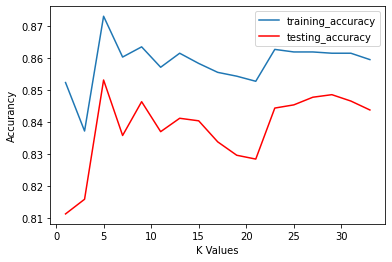

In [28]:
print("KNN Train Test Accuracy with respect to K on scaled data")

plt.plot(k_range, training_accuracy_scores, label = "training_accuracy")
plt.plot(k_range, testing_accuracy_scores,color="red", label = "testing_accuracy")
plt.xlabel("K Values")
plt.ylabel("Accurancy")
plt.legend()
plt.show()

In [29]:
#Training accuracy for best K on scaled data
knn_model = KNeighborsClassifier(n_neighbors=best_k_test_scaled)
knn_model.fit(X_train_scaled, y_train)

y_train_pred = knn_model.predict(X_train_scaled)
y_train_final=metrics.accuracy_score(y_train, y_train_pred)

In [30]:
y_test_final=testing_values[best_k_test_scaled]

In [31]:
print("Train Accuracy with the best K value on Scaled Data: ",y_train_final)
print("Test Accuracy with the best K value on Scaled Data: ",y_test_final)

Train Accuracy with the best K value on Scaled Data:  0.8732
Test Accuracy with the best K value on Scaled Data:  0.8532
